In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from ast import literal_eval

In [2]:
df_arg = pd.read_csv("./data/predicted/veracity_arg_predicted.csv")
df = pd.read_csv("./data/predicted/veracity_predicted.csv")

In [3]:
df_sentiment = pd.read_csv("./data/predicted/sentiment_predicted.csv")

In [4]:
def split_list(row):
    return pd.Series(row)

In [5]:
def convert_list(df,feature):
  df[feature] = df[feature].apply(literal_eval)
  df[[f'{feature}_false', f'{feature}_true']] = df[feature].apply(split_list)
  return df

In [6]:
def parse_df(df):
  df = convert_list(df,'sentiment_probabilities')
  df = convert_list(df,'veracity_probabilities')
  return df


In [7]:
df_arg = parse_df(df_arg)
df = parse_df(df)

In [8]:
df_sentiment = convert_list(df_sentiment,'sentiment_probabilities')

In [9]:
df_total = pd.concat([df,df_arg])

### Distribucion de Sentimientos y Probabilidad

In [10]:
def plot_distribution(label,df,text):
  plt.figure(figsize=(10, 5))
  sns.countplot(x=label, data=df,hue=label,palette=["crimson","skyblue"])
  plt.title(f'Distribución de {text}')
  plt.xlabel(f'{text}')
  plt.ylabel('Número de Noticias')
  plt.show()

In [11]:
def plot_pie_distribution(df,feature,colors,legend,title):
    distribution = df[feature].value_counts()
    print(distribution)
    sizes = distribution.values
    labels = distribution.index
    

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

    plt.legend(labels=legend, loc='upper right')

    plt.title(title)

    plt.show()

#### Dataset Global

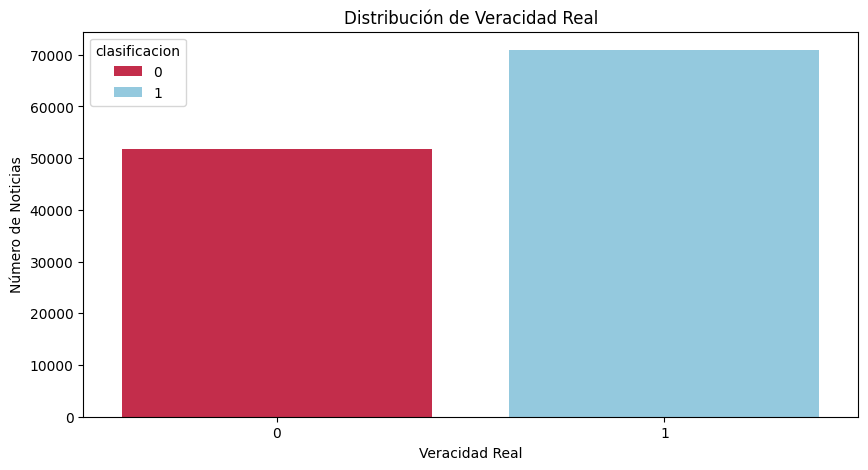

In [12]:
plot_distribution('clasificacion', df,"Veracidad Real")

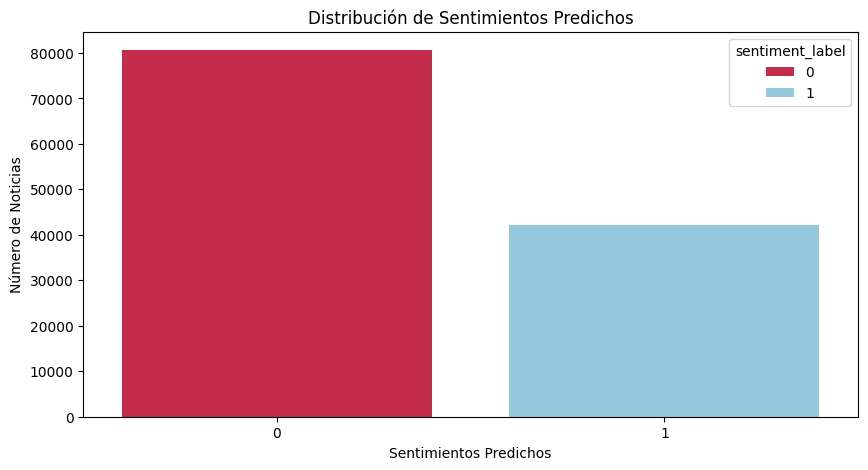

In [10]:
plot_distribution('sentiment_label', df,"Sentimientos Predichos")

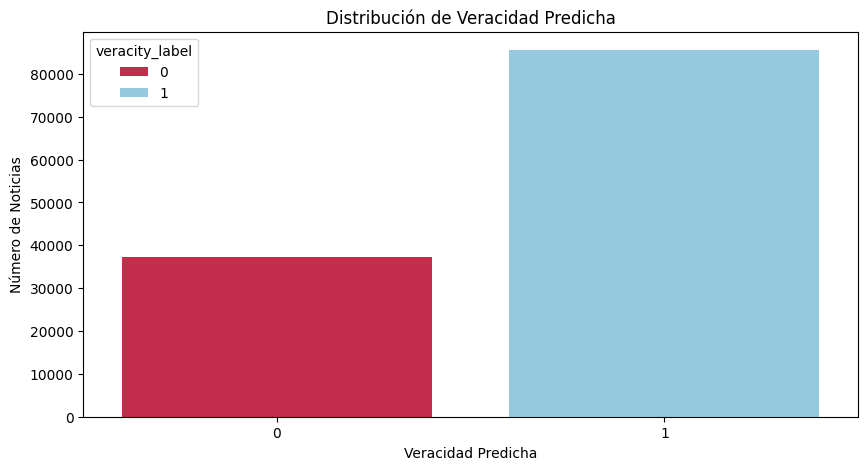

In [11]:
plot_distribution('veracity_label', df,"Veracidad Predicha")

clasificacion
1    70908
0    51868
Name: count, dtype: int64


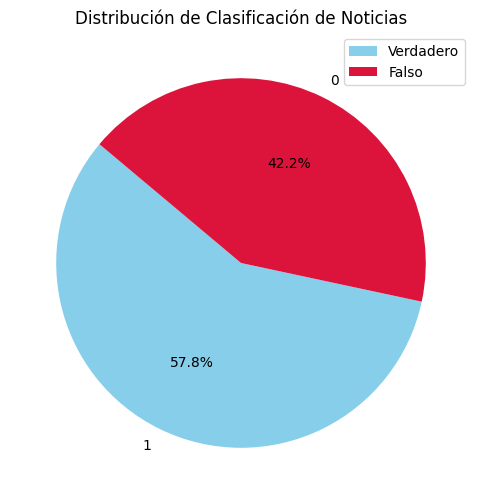

In [83]:
plot_pie_distribution(df,"clasificacion",["skyblue","crimson"],['Verdadero','Falso'],'Distribución de Clasificación de Noticias')

veracity_label
1    85555
0    37221
Name: count, dtype: int64


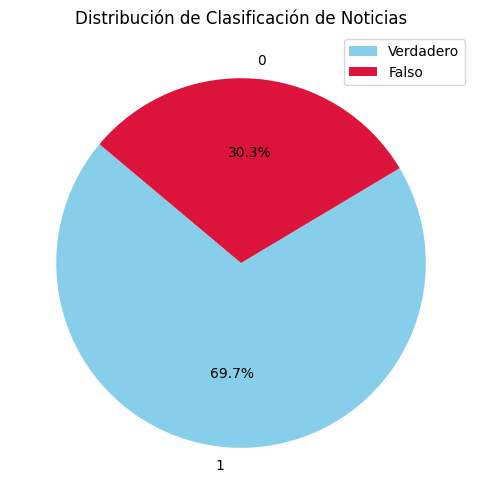

In [84]:
plot_pie_distribution(df,"veracity_label",["skyblue","crimson"],['Verdadero','Falso'],'Distribución de Clasificación de Noticias')

sentiment_label
0    80644
1    42132
Name: count, dtype: int64


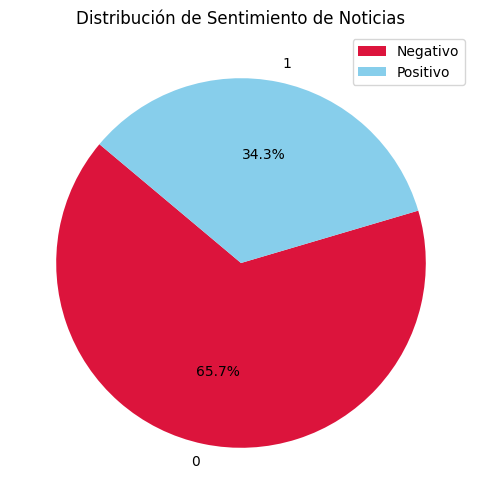

In [86]:
plot_pie_distribution(df,"sentiment_label",["crimson","skyblue"],['Negativo','Positivo'],'Distribución de Sentimiento de Noticias')

In [13]:
def plot_feature_by_feature(dataset,feature_1,feature_2,labels_1,labels_2,x_title,title):
    positivo_counts = dataset.groupby([feature_1, feature_2]).size().unstack().fillna(0)[1]
    negativo_counts = dataset.groupby([feature_1,feature_2]).size().unstack().fillna(0)[0]

    veracidad = positivo_counts.index
    bar_width = 0.35
    linewidth = 0
    index = range(len(veracidad))

    fig, ax = plt.subplots(figsize=(10, 6))

    bar1 = ax.bar(index, negativo_counts, bar_width, label=labels_1[0], color='crimson',linewidth = linewidth, edgecolor='black')

    bar2 = ax.bar([i + bar_width for i in index], positivo_counts, bar_width, label=labels_1[1], color='skyblue',linewidth=linewidth, edgecolor='black')

    ax.set_xlabel(x_title)
    ax.set_ylabel('Cantidad de Noticias')
    ax.set_title(title)
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(labels_2)
    ax.legend() 

    for bars in [bar1, bar2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate('{}'.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), 
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.show()

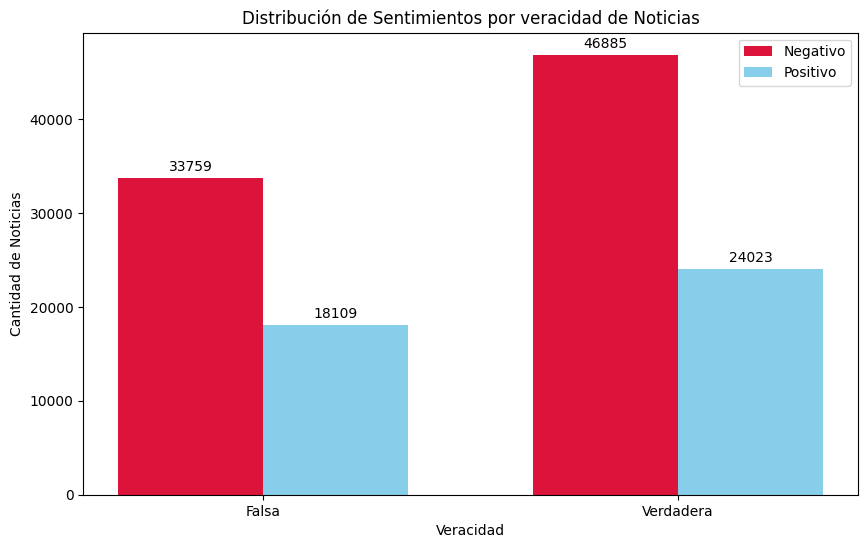

In [79]:
title = "Distribución de Sentimientos por veracidad de Noticias"
x_label= "Veracidad"
plot_feature_by_feature(df,"clasificacion","sentiment_label",["Negativo","Positivo"],["Falsa","Verdadera"],x_label,title)

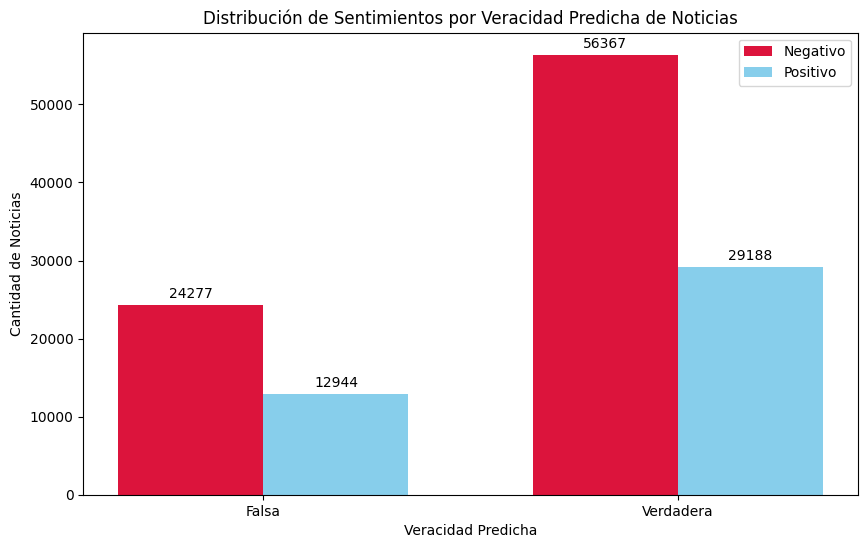

In [80]:
title = "Distribución de Sentimientos por Veracidad Predicha de Noticias"
x_label= "Veracidad Predicha"
plot_feature_by_feature(df,"veracity_label","sentiment_label",["Negativo","Positivo"],["Falsa","Verdadera"],x_label,title)

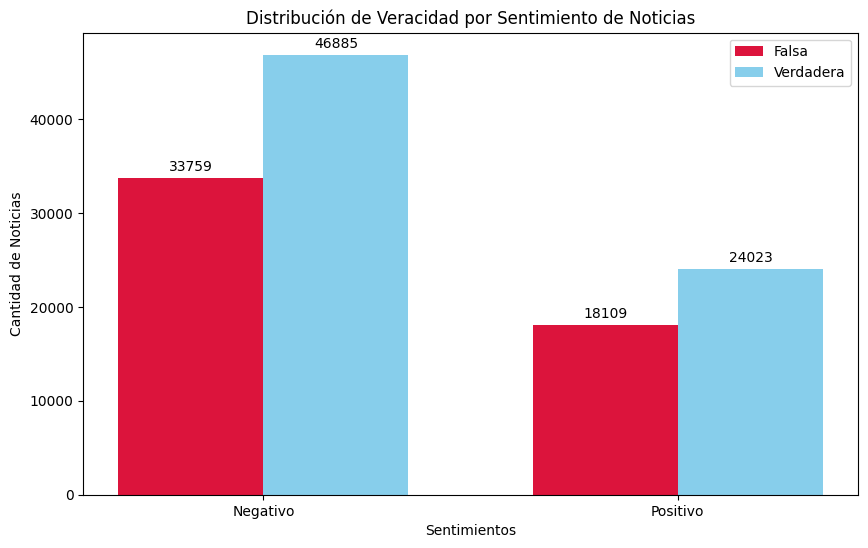

In [81]:
title = "Distribución de Veracidad por Sentimiento de Noticias"
x_label= "Sentimientos"
plot_feature_by_feature(df,"sentiment_label","clasificacion",["Falsa","Verdadera"],["Negativo","Positivo"],x_label,title)

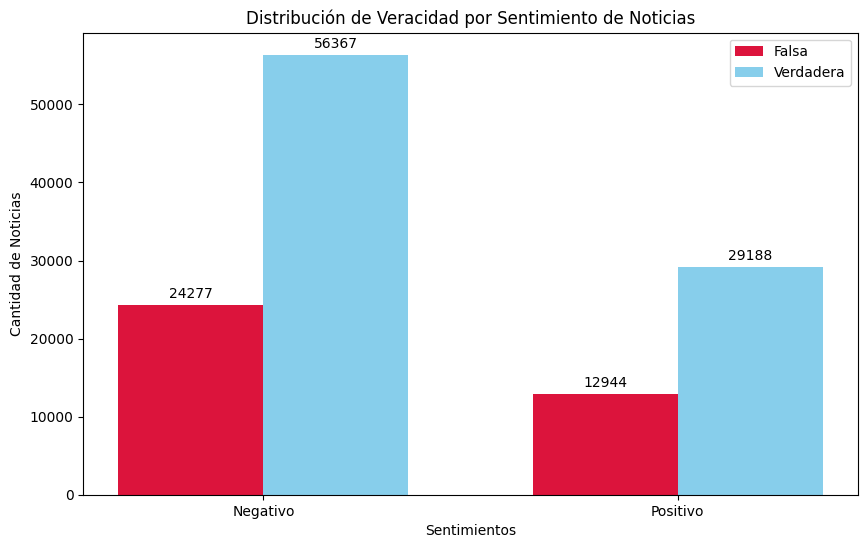

In [82]:
title = "Distribución de Veracidad por Sentimiento de Noticias"
x_label= "Sentimientos"
plot_feature_by_feature(df,"sentiment_label","veracity_label",["Falsa","Verdadera"],["Negativo","Positivo"],x_label,title)

#### Dataset Argentino

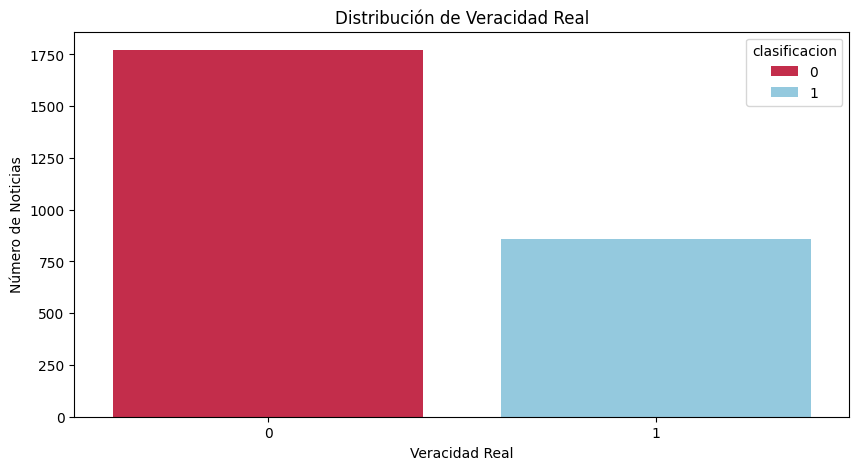

In [12]:
plot_distribution('clasificacion', df_arg,"Veracidad Real")

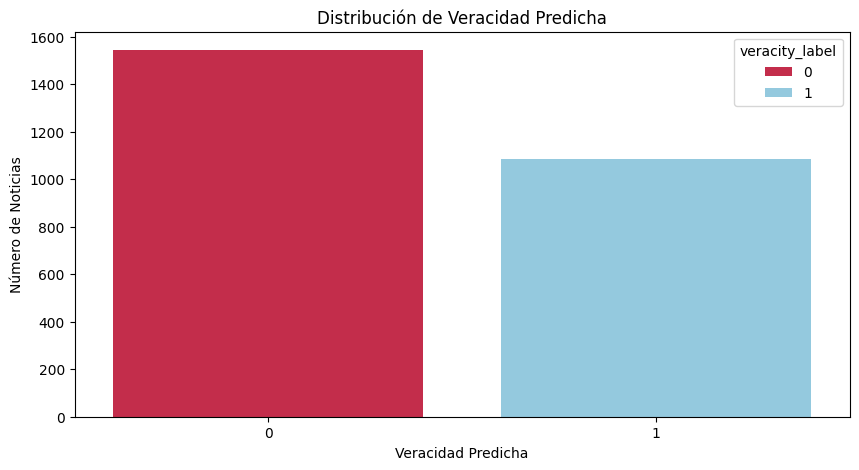

In [13]:
plot_distribution('veracity_label', df_arg,"Veracidad Predicha")

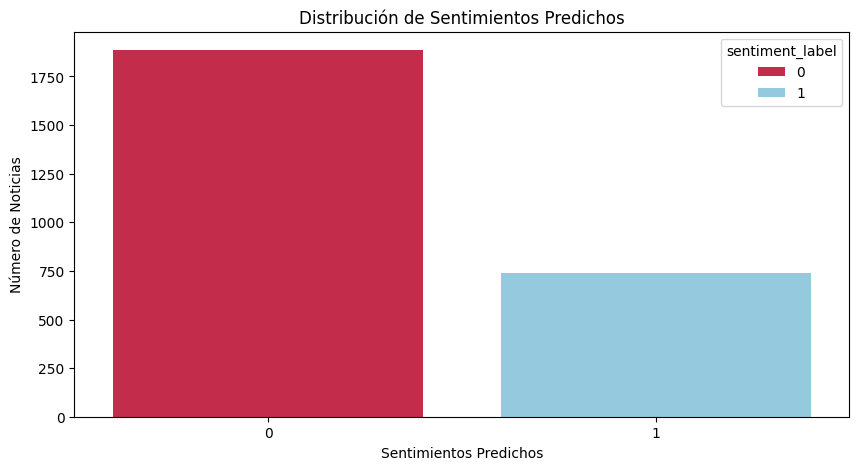

In [14]:
plot_distribution('sentiment_label', df_arg,"Sentimientos Predichos")

clasificacion
0    1771
1     856
Name: count, dtype: int64


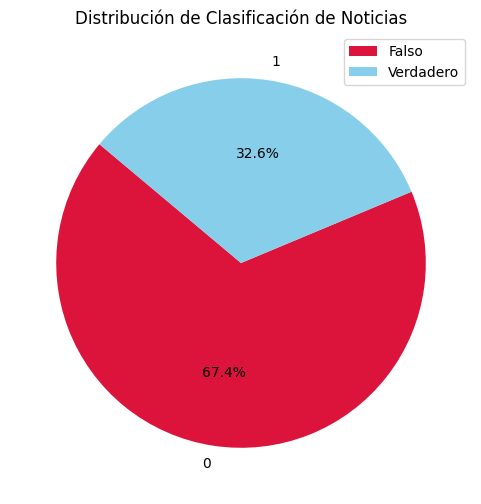

In [88]:
plot_pie_distribution(df_arg,"clasificacion",["crimson","skyblue"],['Falso','Verdadero'],'Distribución de Clasificación de Noticias')

veracity_label
0    1543
1    1084
Name: count, dtype: int64


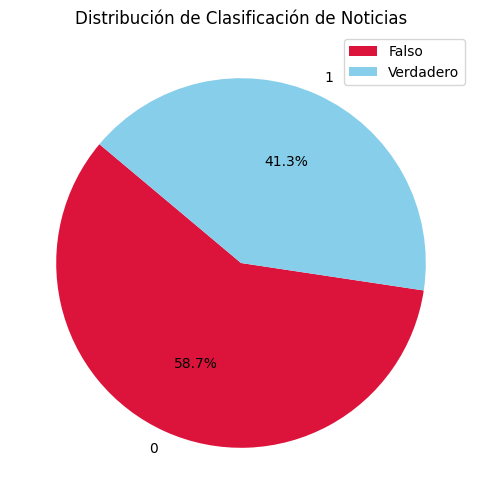

In [89]:
plot_pie_distribution(df_arg,"veracity_label",["crimson","skyblue"],['Falso','Verdadero'],'Distribución de Clasificación de Noticias')

sentiment_label
0    1886
1     741
Name: count, dtype: int64


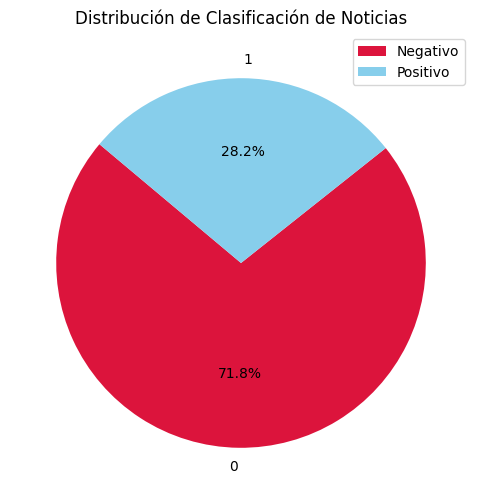

In [91]:
plot_pie_distribution(df_arg,"sentiment_label",["crimson","skyblue"],['Negativo','Positivo'],'Distribución de Clasificación de Noticias')

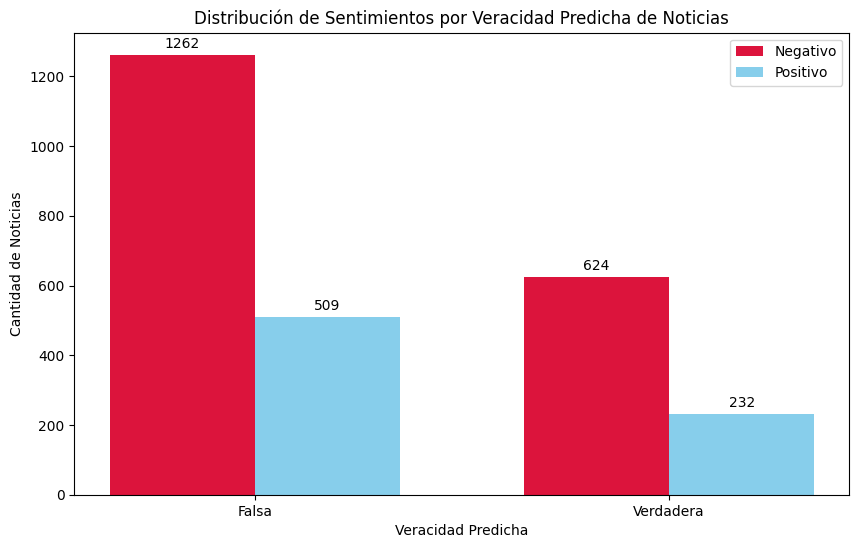

In [94]:
title = "Distribución de Sentimientos por Veracidad Predicha de Noticias"
x_label= "Veracidad Predicha"
plot_feature_by_feature(df_arg,"clasificacion","sentiment_label",["Negativo","Positivo"],["Falsa","Verdadera"],x_label,title)

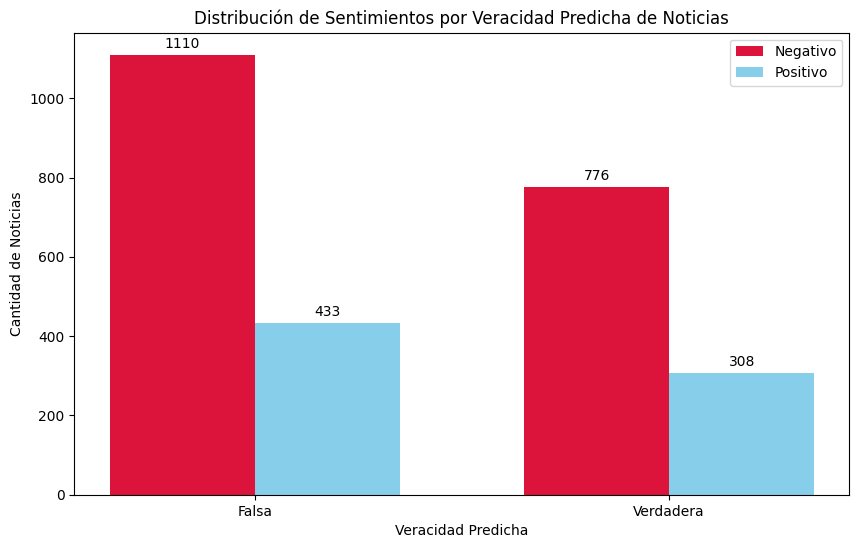

In [93]:
title = "Distribución de Sentimientos por Veracidad Predicha de Noticias"
x_label= "Veracidad Predicha"
plot_feature_by_feature(df_arg,"veracity_label","sentiment_label",["Negativo","Positivo"],["Falsa","Verdadera"],x_label,title)

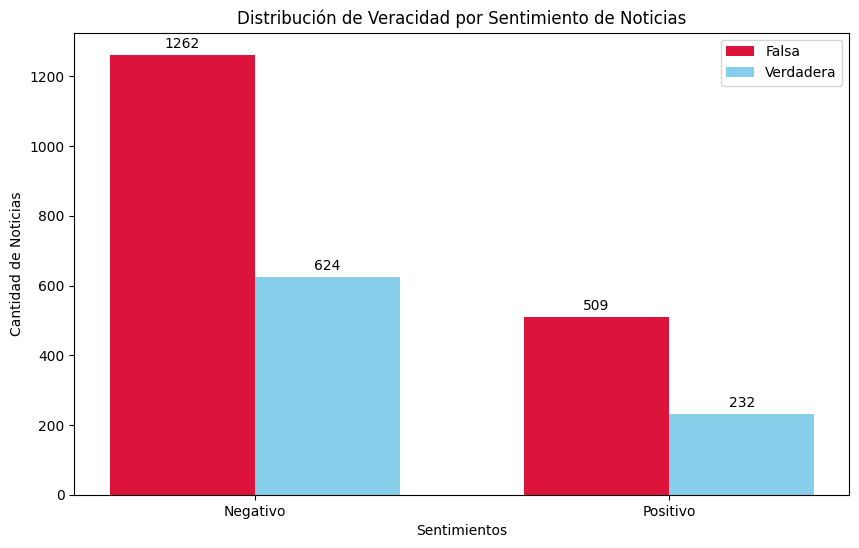

In [95]:
title = "Distribución de Veracidad por Sentimiento de Noticias"
x_label= "Sentimientos"
plot_feature_by_feature(df_arg,"sentiment_label","clasificacion",["Falsa","Verdadera"],["Negativo","Positivo"],x_label,title)

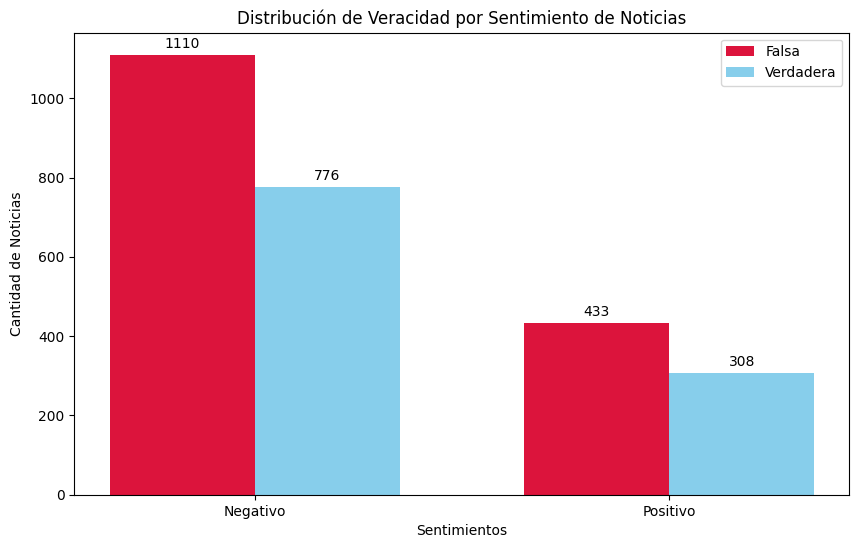

In [96]:
title = "Distribución de Veracidad por Sentimiento de Noticias"
x_label= "Sentimientos"
plot_feature_by_feature(df_arg,"sentiment_label","veracity_label",["Falsa","Verdadera"],["Negativo","Positivo"],x_label,title)

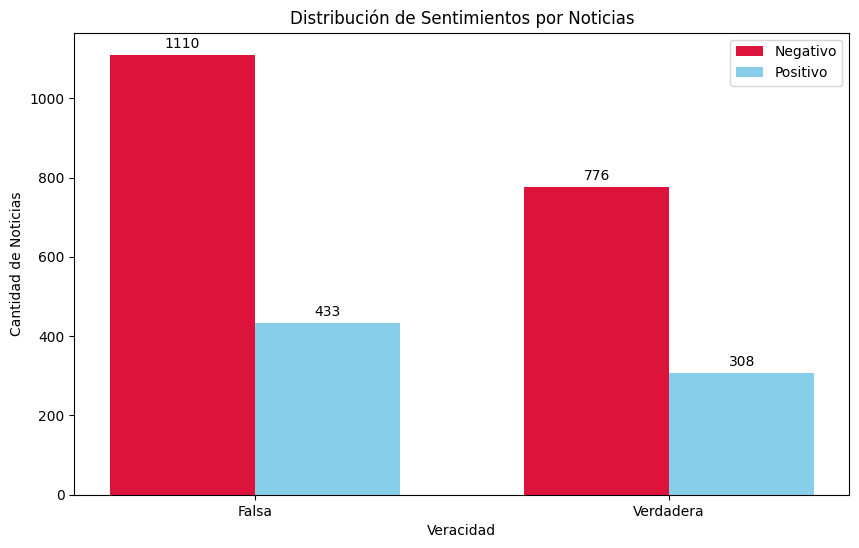

In [52]:
plot_sentiment_by_veracity(df_arg,"veracity_label","sentiment_label")

### Matriz de Confusion

In [14]:
def plot_confusion_matrix(df_1,df_2,text):
  conf_matrix_veracity = confusion_matrix(df_1, df_2)

  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix_veracity, annot=True, fmt='d', cmap='Blues')
  plt.title(f'Matriz de Confusión para {text}')
  plt.xlabel(f'{text}')
  plt.ylabel('Veracidad Real')
  plt.show()


#### Dataset Global

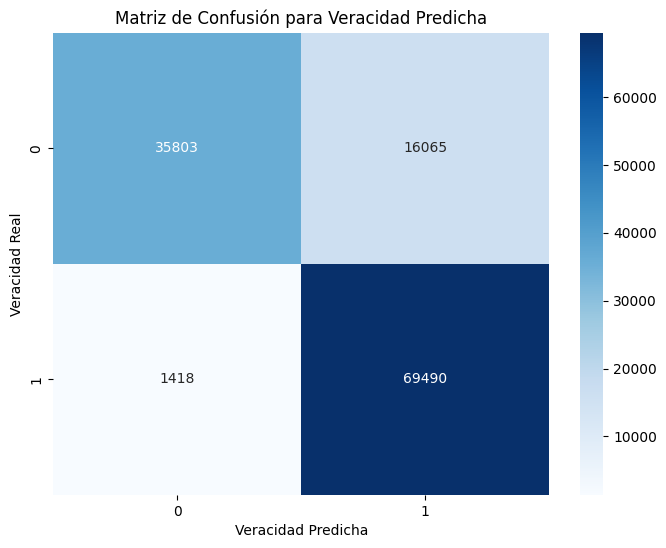

In [16]:
plot_confusion_matrix(df['clasificacion'],df['veracity_label'],'Veracidad Predicha')

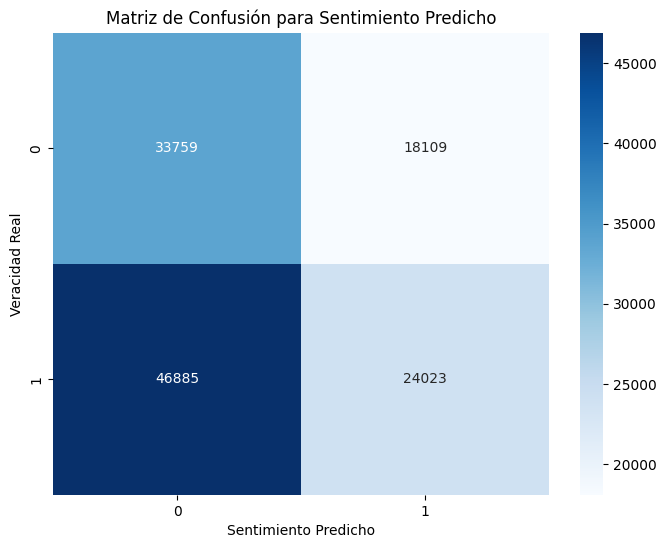

In [17]:
plot_confusion_matrix(df['clasificacion'],df['sentiment_label'],'Sentimiento Predicho')

#### Dataset Argentino

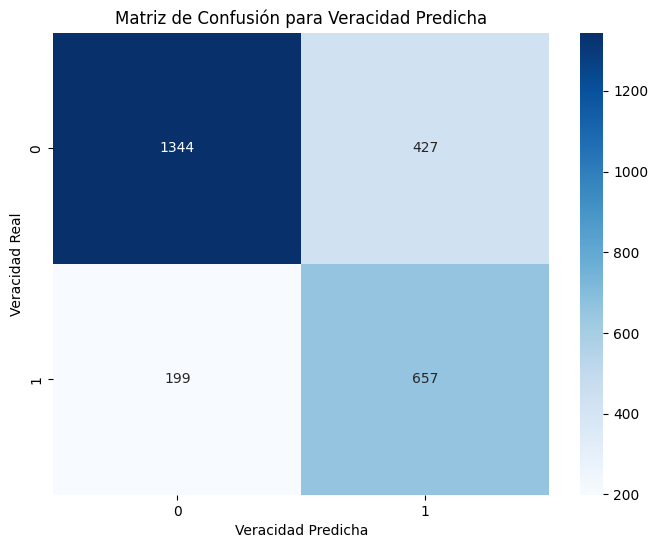

In [18]:
plot_confusion_matrix(df_arg['clasificacion'],df_arg['veracity_label'],'Veracidad Predicha')

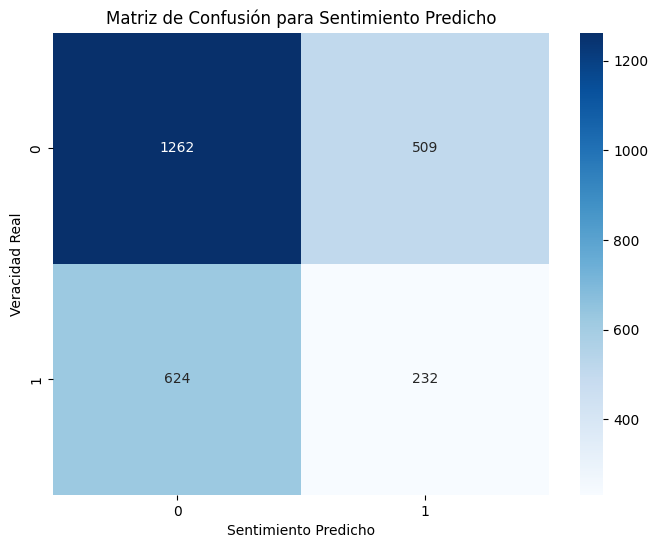

In [19]:
plot_confusion_matrix(df_arg['clasificacion'],df_arg['sentiment_label'],'Sentimiento Predicho')

##### Sentimiento

In [ ]:
df_test = df_sentiment[df_sentiment['sentimiento'] != "Neutral"]
df_test['sentimiento'] = df_test['sentimiento'].replace({'Positivo':1, 'Negativo':0})

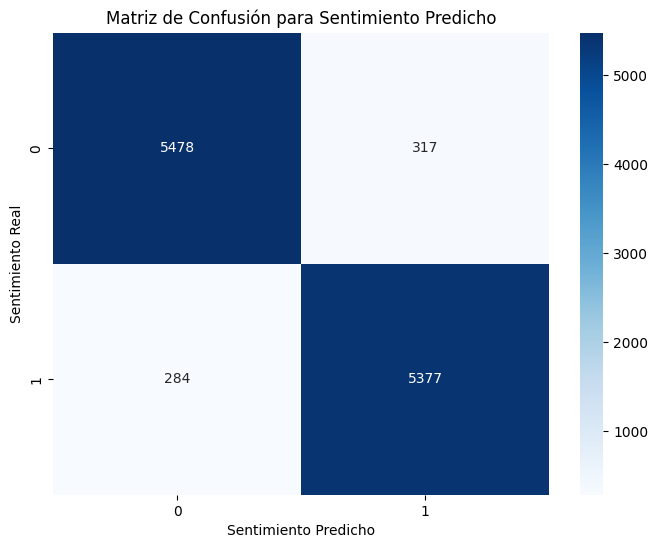

In [10]:
conf_matrix_sentiment = confusion_matrix(df_test['sentimiento'], df_test['sentiment_label'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sentiment, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusión para Sentimiento Predicho')
plt.xlabel(f'Sentimiento Predicho')
plt.ylabel('Sentimiento Real')
plt.show()

## Analisis de Correlacion

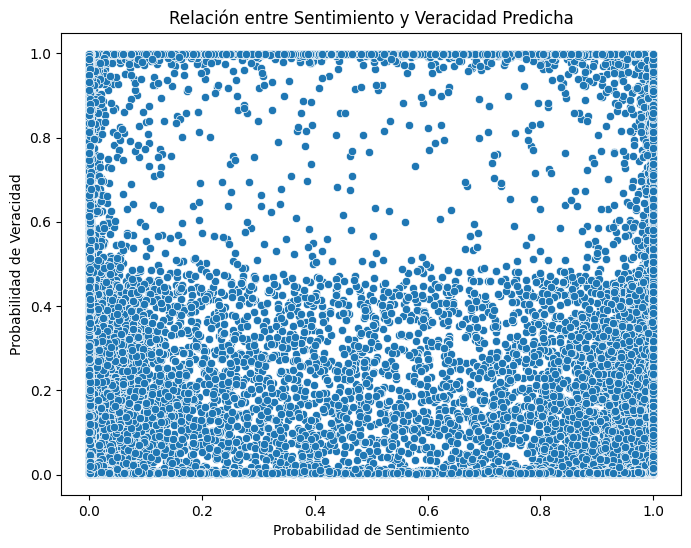

In [15]:
# Gráfico de dispersión entre Sentimiento y Veracidad Predicha
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sentiment_probabilities_false', y='veracity_probabilities_false', data=df)
plt.title('Relación entre Sentimiento y Veracidad Predicha')
plt.xlabel('Probabilidad de Sentimiento')
plt.ylabel('Probabilidad de Veracidad')
plt.show()

In [16]:
df.head()

,clasificacion,texto,sentiment_label,sentiment_probabilities,veracity_label,veracity_probabilities,sentiment_probabilities_false,sentiment_probabilities_true,veracity_probabilities_false,veracity_probabilities_true
0,1,El presidente abre la puerta a unos comicios e...,0,"[0.9996234178543091, 0.00037651995080523193]",1,"[0.40753498673439026, 0.5924650430679321]",0.999623,0.000377,0.407535,0.592465
1,1,"En un escrito, la abogada del Estado Rosa Mari...",0,"[0.9999406337738037, 5.938944377703592e-05]",1,"[0.07654518634080887, 0.9234548211097717]",0.999941,0.000059,0.076545,0.923455
2,0,Este lunes y martes la Asamblea de Madrid acog...,1,"[9.01715611689724e-05, 0.9999098777770996]",1,"[0.25899437069892883, 0.7410055994987488]",0.000090,0.999910,0.258994,0.741006
3,1,Resulta evidente que la ley ha tenido algunos ...,0,"[0.9999659061431885, 3.413212834857404e-05]",1,"[0.44350090622901917, 0.5564991235733032]",0.999966,0.000034,0.443501,0.556499
4,1,"El hispanista, que ya ocupo un puesto simbolic...",1,"[0.00020081509137526155, 0.9997991919517517]",1,"[0.37994152307510376, 0.6200584173202515]",0.000201,0.999799,0.379942,0.620058


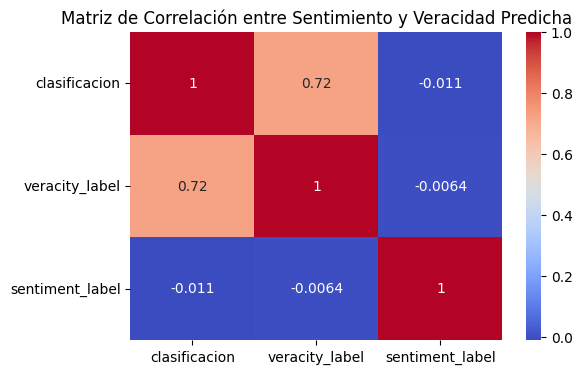

In [18]:
correlation_matrix = df[['clasificacion', 'veracity_label','sentiment_label']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Sentimiento y Veracidad Predicha')
plt.show()

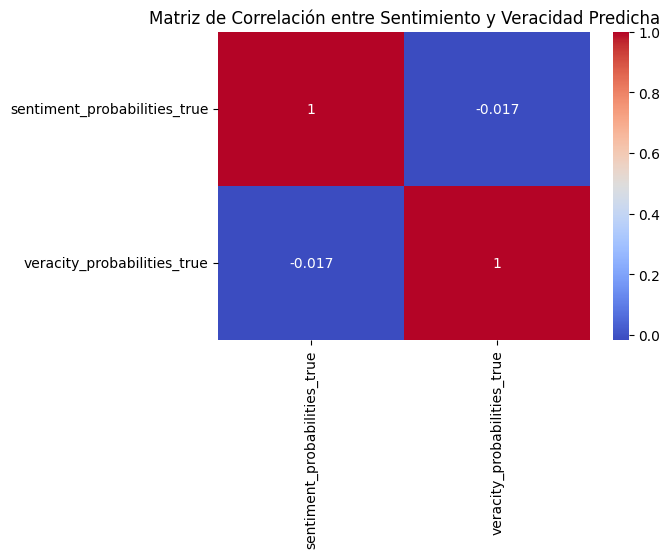

In [19]:
# Matriz de correlación entre Sentimiento y Veracidad Predicha
correlation_matrix = df[['sentiment_probabilities_true', 'veracity_probabilities_true']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Sentimiento y Veracidad Predicha')
plt.show()